In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.9.1


In [3]:
data=pd.read_csv('dataset.csv',header=None)


data
#data.shape
# m/kg/sec/°C/bar/W

    

,0,1,2,3,4,5
0,1490.10107,171.23222,537.93457,43.21999,338.08185,140.12219
1,1490.10181,170.53206,536.27423,44.46617,338.32889,139.56049
2,1490.01685,172.22186,536.83234,43.48812,339.69952,136.88181
3,1489.85059,170.03719,538.39172,47.54314,335.97842,148.23610
4,1490.04370,171.16704,538.39362,43.65507,337.67096,141.60060
...,...,...,...,...,...,...
791,1488.64844,169.91246,539.85040,45.93911,337.10886,146.86214
792,1489.84546,171.63402,537.04602,42.87591,338.35321,138.19769
793,1489.68787,170.20795,537.05835,44.07642,338.60727,139.88130
794,1491.46875,169.10745,537.19476,44.49132,337.13861,142.77812


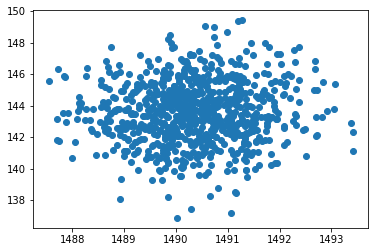

In [4]:
#data vs op scatter plot
ip1=data.iloc[:,[0]]
ip2=data.iloc[:,[1]]
ip3=data.iloc[:,[2]]
ip4=data.iloc[:,[3]]
ip5=data.iloc[:,[4]]
op=data.iloc[:,[5]]

plt.scatter(ip1,op)
plt.show()


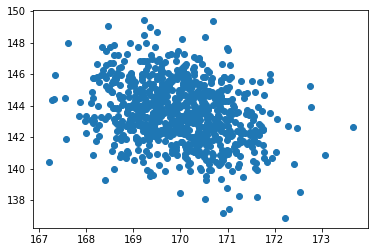

In [5]:
plt.scatter(ip2,op)
plt.show()


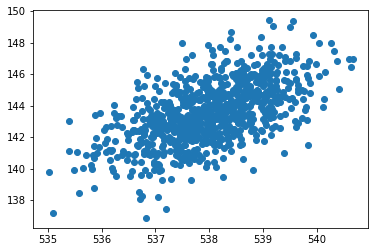

In [6]:
plt.scatter(ip3,op)
plt.show()


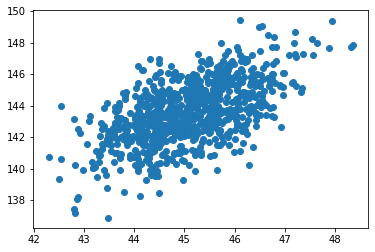

In [7]:
plt.scatter(ip4,op)
plt.show()


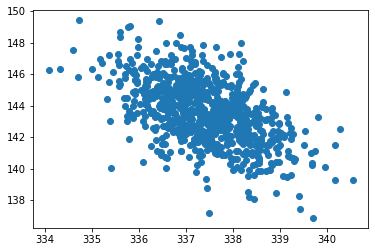

In [8]:
plt.scatter(ip5,op)
plt.show()


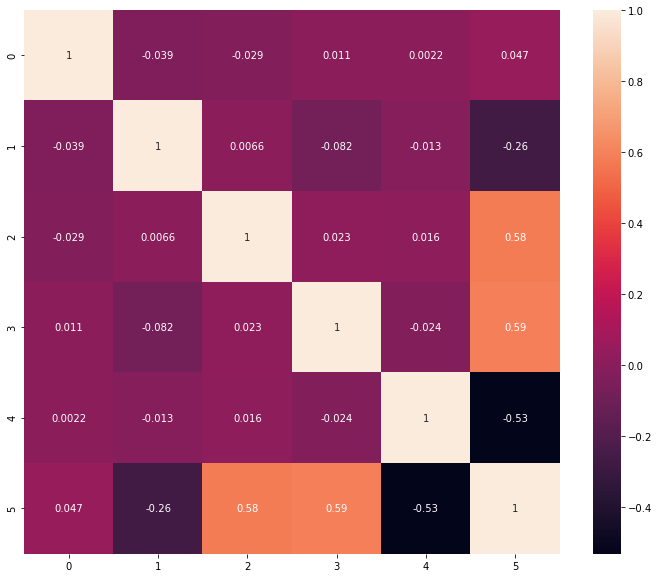

In [9]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 796.],
        [796.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 796.,   0.,   0.,   0.,   0.,   0.,   0.],
        [796.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., 796.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [796.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  42.29597 ,  187.407828,  332.519686,  477.631544,  622.743402,
         767.85526 ,  912.967118, 1058.078976, 1203.190834, 1348.302692,
        1493.41455 ]),
 <a list of 6 BarContainer objects>)

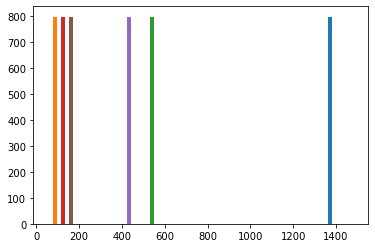

In [10]:
#i1=data.iloc[:,0]
plt.hist(data)

(array([ 14.,  34.,  78., 129., 193., 148., 121.,  51.,  21.,   7.]),
 array([1487.54468 , 1488.131667, 1488.718654, 1489.305641, 1489.892628,
        1490.479615, 1491.066602, 1491.653589, 1492.240576, 1492.827563,
        1493.41455 ]),
 <BarContainer object of 10 artists>)

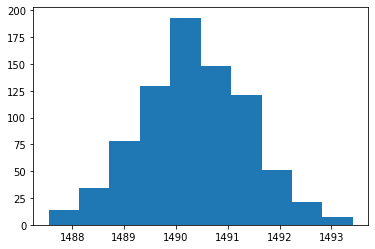

In [11]:
plt.hist(ip1)

(array([  7.,  38., 116., 190., 203., 156.,  63.,  16.,   5.,   2.]),
 array([167.19818 , 167.844671, 168.491162, 169.137653, 169.784144,
        170.430635, 171.077126, 171.723617, 172.370108, 173.016599,
        173.66309 ]),
 <BarContainer object of 10 artists>)

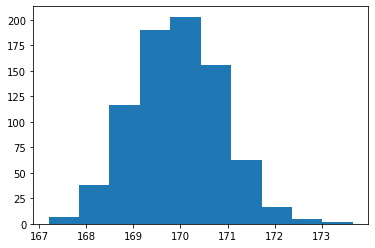

In [12]:
plt.hist(ip2)

(array([  7.,  19.,  44., 107., 170., 175., 145.,  86.,  33.,  10.]),
 array([535.01141 , 535.577579, 536.143748, 536.709917, 537.276086,
        537.842255, 538.408424, 538.974593, 539.540762, 540.106931,
        540.6731  ]),
 <BarContainer object of 10 artists>)

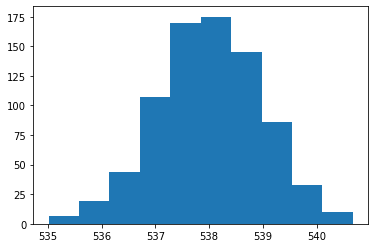

In [13]:
plt.hist(ip3)

(array([ 11.,  33.,  91., 181., 174., 148., 104.,  37.,  13.,   4.]),
 array([42.29597 , 42.901891, 43.507812, 44.113733, 44.719654, 45.325575,
        45.931496, 46.537417, 47.143338, 47.749259, 48.35518 ]),
 <BarContainer object of 10 artists>)

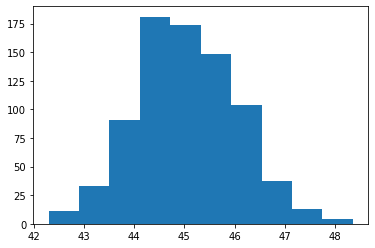

In [14]:
plt.hist(ip4)

(array([  5.,   7.,  47., 127., 197., 188., 149.,  57.,  14.,   5.]),
 array([334.07053 , 334.719202, 335.367874, 336.016546, 336.665218,
        337.31389 , 337.962562, 338.611234, 339.259906, 339.908578,
        340.55725 ]),
 <BarContainer object of 10 artists>)

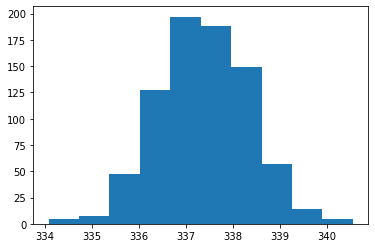

In [15]:
plt.hist(ip5)

In [16]:
#data normalization
# apply normalization technique min_max_scaling
data_min_max_scaled = data.copy()
for column in data_min_max_scaled.columns:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
    
data=data_min_max_scaled
data_min_max_scaled.corr

<bound method DataFrame.corr of             0         1         2         3         4         5
0    0.435510  0.623990  0.516305  0.152498  0.618390  0.258398
1    0.435637  0.515689  0.223046  0.358166  0.656474  0.213606
2    0.421163  0.777069  0.321623  0.196750  0.867771  0.000000
3    0.392838  0.439141  0.597050  0.865983  0.294122  0.905425
4    0.425737  0.613908  0.597385  0.224303  0.555046  0.376290
..        ...       ...       ...       ...       ...       ...
791  0.188038  0.419848  0.854690  0.601257  0.468392  0.795861
792  0.391964  0.686141  0.359364  0.095712  0.660223  0.104932
793  0.365117  0.465555  0.361542  0.293842  0.699389  0.239188
794  0.668511  0.295328  0.385636  0.362316  0.472979  0.470189
795  0.475252  0.477410  0.907568  0.524788  0.547665  0.737830

[796 rows x 6 columns]>

(array([[ 14.,  34.,  78., 129., 193., 148., 121.,  51.,  21.,   7.],
        [  7.,  38., 116., 190., 203., 156.,  63.,  16.,   5.,   2.],
        [  7.,  19.,  44., 107., 170., 175., 145.,  86.,  33.,  10.],
        [ 11.,  33.,  91., 181., 174., 148., 104.,  37.,  13.,   4.],
        [  5.,   7.,  47., 127., 197., 188., 149.,  57.,  14.,   5.],
        [  4.,   8.,  39., 108., 186., 178., 153.,  86.,  26.,   8.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 6 BarContainer objects>)

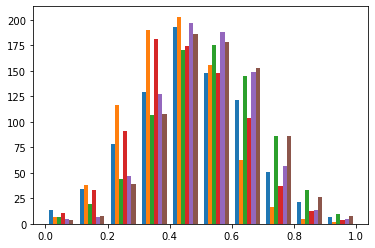

In [17]:
plt.hist(data)

In [18]:
x=data.iloc[:,[0,1,2,3,4]]
x
#x=np.array(x)
x

,0,1,2,3,4
0,0.435510,0.623990,0.516305,0.152498,0.618390
1,0.435637,0.515689,0.223046,0.358166,0.656474
2,0.421163,0.777069,0.321623,0.196750,0.867771
3,0.392838,0.439141,0.597050,0.865983,0.294122
4,0.425737,0.613908,0.597385,0.224303,0.555046
...,...,...,...,...,...
791,0.188038,0.419848,0.854690,0.601257,0.468392
792,0.391964,0.686141,0.359364,0.095712,0.660223
793,0.365117,0.465555,0.361542,0.293842,0.699389
794,0.668511,0.295328,0.385636,0.362316,0.472979


In [19]:
y= data.iloc[:,[5]]
y


,5
0,0.258398
1,0.213606
2,0.000000
3,0.905425
4,0.376290
...,...
791,0.795861
792,0.104932
793,0.239188
794,0.470189


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(5, input_dim=5, activation='sigmoid'),#input layer
    keras.layers.Dense(15, activation='relu'),#hiddden1
    keras.layers.Dense(10, activation='relu'),#hidden 2
    keras.layers.Dense(5, activation='relu'),#hidden 3
    keras.layers.Dense(1, activation='sigmoid')# output layer 
])


## last change optimizer chnaged from adam to RMSprop
optimizer=keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(optimizer,loss="mean_absolute_error")

print(model.fit(x_train,y_train,epochs=1000,batch_size=7))

Epoch 1/1000
86/86 [==============================] - 4s 8ms/step - loss: 0.1233
Epoch 2/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.1090
Epoch 3/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0729
Epoch 4/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0486
Epoch 5/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0435
Epoch 6/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0412
Epoch 7/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0388
Epoch 8/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0389
Epoch 9/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0376
Epoch 10/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0377
Epoch 11/1000
86/86 [==============================] - 0s 6ms/step - loss: 0.0372
Epoch 12/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0357
Epoch 13/1000
86/86 [====

86/86 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 102/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 103/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 104/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 105/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 106/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 107/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 108/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 109/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 110/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 111/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 112/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 113/1000
86/8

86/86 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 200/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 201/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 202/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 203/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 204/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 205/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 206/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 207/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 208/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 209/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 210/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 211/1000
86/8

86/86 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 298/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 299/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 300/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 301/1000
86/86 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 302/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0075
Epoch 303/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 304/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 305/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 306/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0074
Epoch 307/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0071
Epoch 308/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0069
Epoch 309/1000
86/8

86/86 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 396/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 397/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0070
Epoch 398/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 399/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 400/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 401/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 402/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 403/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 404/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 405/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 406/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 407/1000
86/8

86/86 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 494/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 495/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 496/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 497/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 498/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 499/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 500/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.0060
Epoch 501/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.0063
Epoch 502/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0063
Epoch 503/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0064
Epoch 504/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0065
Epoch 505/1000


86/86 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 592/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 593/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0060
Epoch 594/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0059
Epoch 595/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 596/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 597/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0059
Epoch 598/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0060
Epoch 599/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0059
Epoch 600/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0057
Epoch 601/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0058
Epoch 602/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0061
Epoch 603/1000
86/8

86/86 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 690/1000
86/86 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 691/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 692/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 693/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0057
Epoch 694/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 695/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 696/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 697/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 698/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 699/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 700/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 701/1000
86/8

86/86 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 788/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 789/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 790/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 791/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 792/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 793/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 794/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0055
Epoch 795/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0057
Epoch 796/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 797/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.0053
Epoch 798/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.0055
Epoch 799/1000
86

86/86 [==============================] - 1s 10ms/step - loss: 0.0054
Epoch 886/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0054
Epoch 887/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0052
Epoch 888/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 889/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 890/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 891/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0054
Epoch 892/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0053
Epoch 893/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0054
Epoch 894/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0054
Epoch 895/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.0052
Epoch 896/1000
86/86 [==============================] - 1s 11ms/step - loss: 0.0049
Epoch 897/1000
8

86/86 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 984/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 985/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 986/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 987/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 988/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0053
Epoch 989/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0053
Epoch 990/1000
86/86 [==============================] - 1s 12ms/step - loss: 0.0052
Epoch 991/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0050
Epoch 992/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0053
Epoch 993/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0052
Epoch 994/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0052
Epoch 995/1000


In [23]:
model.history.history['loss']
loss_without_dropout=np.array(model.history.history['loss'])
loss_without_dropout

array([0.12332541, 0.10902153, 0.0728865 , 0.04860656, 0.04351528,
       0.04121191, 0.03877559, 0.03886365, 0.03757417, 0.03774318,
       0.0372379 , 0.03573587, 0.03428574, 0.03431888, 0.0334974 ,
       0.03210154, 0.03201999, 0.03173026, 0.03173778, 0.03144766,
       0.03109812, 0.03076494, 0.03041832, 0.0295892 , 0.02907699,
       0.02828146, 0.02823847, 0.02745502, 0.02698935, 0.02728923,
       0.02639563, 0.02643971, 0.02550448, 0.02518725, 0.02530533,
       0.02518652, 0.02465066, 0.02406729, 0.02385603, 0.02412567,
       0.02348354, 0.02315092, 0.02331447, 0.02289278, 0.02299155,
       0.02223944, 0.02206328, 0.0221502 , 0.02117571, 0.02138816,
       0.02014148, 0.02016321, 0.01969461, 0.01907484, 0.01890829,
       0.0188508 , 0.01798716, 0.01901505, 0.01828765, 0.01812821,
       0.01804808, 0.01753164, 0.01717952, 0.01697715, 0.01723445,
       0.01600053, 0.01633129, 0.01564721, 0.01597364, 0.01578339,
       0.01514348, 0.01473894, 0.01451375, 0.01466965, 0.01430

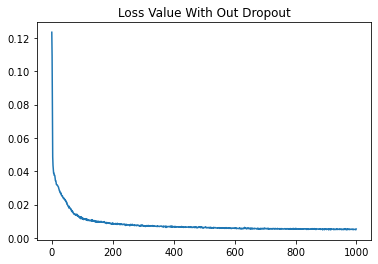

In [24]:
plt.plot(model.history.history['loss'])
plt.title("Loss Value With Out Dropout")
plt.show()

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 15)                90        
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [26]:
x_test[:1]


,0,1,2,3,4
544,0.292247,0.454285,0.662057,0.61834,0.534999


In [27]:
y_test[:1]

,5
544,0.661123


In [28]:
model.predict(x_test[:1])

1/1 [==============================] - 0s 484ms/step


array([[0.6592222]], dtype=float32)

# with dropout

In [30]:
modelwd = keras.Sequential([
    keras.layers.Dense(5, input_dim=5, activation='sigmoid'),#input layer
    keras.layers.Dropout(0.1),
    keras.layers.Dense(15, activation='relu'),#hiddden1
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='relu'),#hidden 2
    keras.layers.Dropout(0.1),
    keras.layers.Dense(5, activation='relu'),#hidden 3
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')# output layer 
])


optimizer=keras.optimizers.Adam(learning_rate=0.005)
modelwd.compile(optimizer,loss="mean_absolute_error")

modelwd.fit(x_train,y_train,epochs=1000,batch_size=7)


Epoch 1/1000
86/86 [==============================] - 3s 8ms/step - loss: 0.1278
Epoch 2/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.1266
Epoch 3/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.1256
Epoch 4/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.1205
Epoch 5/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.1061
Epoch 6/1000
86/86 [==============================] - 1s 11ms/step - loss: 0.0932
Epoch 7/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0843
Epoch 8/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0731
Epoch 9/1000
86/86 [==============================] - 2s 21ms/step - loss: 0.0716
Epoch 10/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.0713
Epoch 11/1000
86/86 [==============================] - 1s 10ms/step - loss: 0.0628
Epoch 12/1000
86/86 [==============================] - 1s 11ms/step - loss: 0.0618
Epoch 13/1000
86/86

86/86 [==============================] - 0s 4ms/step - loss: 0.0341
Epoch 101/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 102/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0360
Epoch 103/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0343
Epoch 104/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0342
Epoch 105/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 106/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 107/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 108/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 109/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 110/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 111/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 112/1000
86/8

86/86 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 199/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 200/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 201/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 202/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 203/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 204/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 205/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 206/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 207/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 208/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 209/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 210/1000
86/8

86/86 [==============================] - 1s 6ms/step - loss: 0.0292
Epoch 297/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0291
Epoch 298/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0273
Epoch 299/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0237
Epoch 300/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0275
Epoch 301/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0298
Epoch 302/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0272
Epoch 303/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0264
Epoch 304/1000
86/86 [==============================] - 1s 11ms/step - loss: 0.0250
Epoch 305/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0262
Epoch 306/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0238
Epoch 307/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0242
Epoch 308/1000
86/

86/86 [==============================] - 0s 4ms/step - loss: 0.0266
Epoch 395/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0284
Epoch 396/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0278
Epoch 397/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 398/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 399/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 400/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 401/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0272
Epoch 402/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0279
Epoch 403/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 404/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 405/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 406/1000
86/8

86/86 [==============================] - 0s 5ms/step - loss: 0.0269
Epoch 493/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0253
Epoch 494/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0274
Epoch 495/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 496/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0283
Epoch 497/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0268
Epoch 498/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0252
Epoch 499/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0257
Epoch 500/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0270
Epoch 501/1000
86/86 [==============================] - 1s 12ms/step - loss: 0.0223
Epoch 502/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0240
Epoch 503/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0280
Epoch 504/1000
86/

86/86 [==============================] - 1s 6ms/step - loss: 0.0233
Epoch 591/1000
86/86 [==============================] - 0s 6ms/step - loss: 0.0279
Epoch 592/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0253
Epoch 593/1000
86/86 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 594/1000
86/86 [==============================] - 0s 6ms/step - loss: 0.0253
Epoch 595/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.0256
Epoch 596/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0242
Epoch 597/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0247
Epoch 598/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0255
Epoch 599/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 600/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0246
Epoch 601/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0222
Epoch 602/1000
86/8

86/86 [==============================] - 1s 8ms/step - loss: 0.0254
Epoch 689/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0258
Epoch 690/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0279
Epoch 691/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0254
Epoch 692/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0253
Epoch 693/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0250
Epoch 694/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0240
Epoch 695/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0238
Epoch 696/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0256
Epoch 697/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0233
Epoch 698/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0235
Epoch 699/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0199
Epoch 700/1000
86/8

86/86 [==============================] - 0s 4ms/step - loss: 0.0235
Epoch 787/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0260
Epoch 788/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 789/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0278
Epoch 790/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 791/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 792/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 793/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0247
Epoch 794/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 795/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0278
Epoch 796/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 797/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 798/1000
86/8

86/86 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 885/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 886/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0247
Epoch 887/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0228
Epoch 888/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0246
Epoch 889/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0255
Epoch 890/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0246
Epoch 891/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0230
Epoch 892/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0230
Epoch 893/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0259
Epoch 894/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0237
Epoch 895/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0260
Epoch 896/1000
86/8

86/86 [==============================] - 0s 5ms/step - loss: 0.0223
Epoch 983/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 984/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.0239
Epoch 985/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0237
Epoch 986/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0234
Epoch 987/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0266
Epoch 988/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0266
Epoch 989/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0277
Epoch 990/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0256
Epoch 991/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0260
Epoch 992/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.0238
Epoch 993/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.0237
Epoch 994/1000
86/8

In [ ]:
modelwd.history.history??

In [31]:
loss_with_dropout=np.array(modelwd.history.history['loss'])
loss_with_dropout

array([0.12778154, 0.12662484, 0.12558024, 0.1205187 , 0.10605312,
       0.09320986, 0.08426597, 0.07305141, 0.07164337, 0.07132392,
       0.06276859, 0.06179395, 0.0633857 , 0.05593692, 0.06051999,
       0.05188227, 0.05448778, 0.05039359, 0.05512058, 0.0575207 ,
       0.04770079, 0.05207517, 0.04869284, 0.04918175, 0.04899524,
       0.04680554, 0.04611674, 0.04815442, 0.04144565, 0.04239056,
       0.04922453, 0.04693768, 0.05033088, 0.04826193, 0.04783535,
       0.04178423, 0.04396462, 0.0469139 , 0.04247418, 0.0449888 ,
       0.04094143, 0.04554626, 0.04121568, 0.042798  , 0.04126464,
       0.04252234, 0.03992735, 0.04150143, 0.0454605 , 0.03851524,
       0.03980113, 0.03902439, 0.04010879, 0.04109994, 0.04153369,
       0.04403989, 0.0410385 , 0.03953376, 0.04201706, 0.04263248,
       0.03891718, 0.0379916 , 0.04247208, 0.04082773, 0.03883458,
       0.03750375, 0.03549385, 0.0418156 , 0.04414752, 0.03997429,
       0.04152632, 0.03507261, 0.03667529, 0.03387041, 0.04107

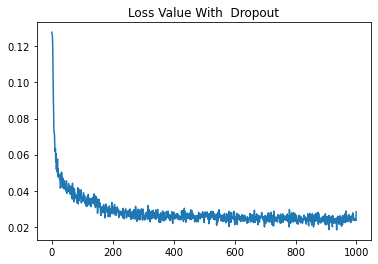

In [32]:
plt.plot(modelwd.history.history['loss'])
plt.title("Loss Value With  Dropout")
plt.show()

In [33]:
print(x_test[:1],y_test[:1])

            0         1         2        3         4
544  0.292247  0.454285  0.662057  0.61834  0.534999             5
544  0.661123


In [34]:
modelwd.predict(x_test[:1])

1/1 [==============================] - 0s 328ms/step


array([[0.67532927]], dtype=float32)

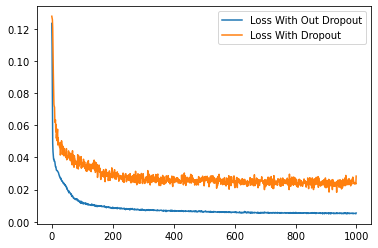

In [35]:

plt.plot(loss_without_dropout)
plt.plot(loss_with_dropout)
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(['Loss With Out Dropout','Loss With Dropout'])

plt.show()

In [36]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 15)                90        
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [37]:
modelwd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 30        
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_16 (Dense)            (None, 15)                90        
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 5)                

In [38]:
df = pd.DataFrame({"loss_values_without_dropout" : loss_without_dropout, "loss_values_with_dropout" : loss_with_dropout})
df.to_csv("lossvalues2.csv", index=False)

7/7 [==============================] - 0s 9ms/step


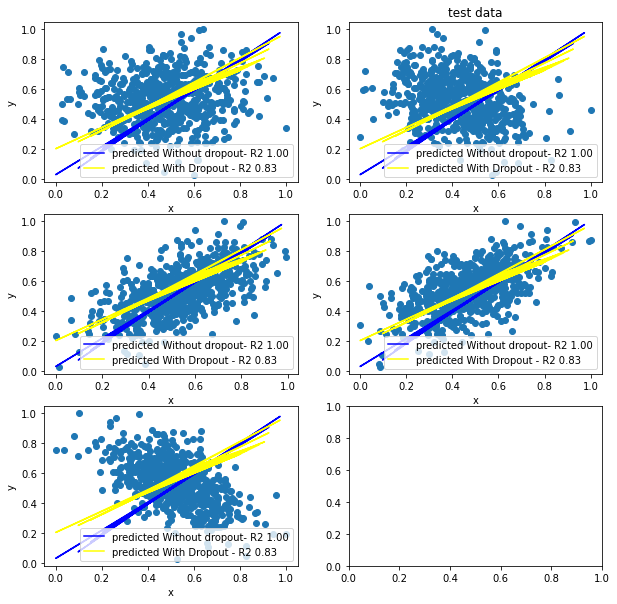

In [39]:
y_pred_loss_withoutdrop=model.predict(x_test)
y_pred_loss_withdrop=modelwd.predict(x_test)


fig,ex = plt.subplots(3,2)

ex[0,0].scatter(x_train.iloc[:,[0]],y_train)
ex[0,1].scatter(x_train.iloc[:,[1]],y_train)
ex[1,0].scatter(x_train.iloc[:,[2]],y_train)
ex[1,1].scatter(x_train.iloc[:,[3]],y_train)
ex[2,0].scatter(x_train.iloc[:,[4]],y_train)


ex[0,0].plot(y_test, y_pred_loss_withoutdrop, label='predicted Without dropout- R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withoutdrop)), color='blue')
ex[0,0].plot(y_test, y_pred_loss_withdrop, label='predicted With Dropout - R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withdrop)), color='yellow')
ex[0,1].plot(y_test, y_pred_loss_withoutdrop, label='predicted Without dropout- R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withoutdrop)), color='blue')
ex[0,1].plot(y_test, y_pred_loss_withdrop, label='predicted With Dropout - R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withdrop)), color='yellow')
ex[1,0].plot(y_test, y_pred_loss_withoutdrop, label='predicted Without dropout- R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withoutdrop)), color='blue')
ex[1,0].plot(y_test, y_pred_loss_withdrop, label='predicted With Dropout - R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withdrop)), color='yellow')
ex[1,1].plot(y_test, y_pred_loss_withoutdrop, label='predicted Without dropout- R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withoutdrop)), color='blue')
ex[1,1].plot(y_test, y_pred_loss_withdrop, label='predicted With Dropout - R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withdrop)), color='yellow')
ex[2,0].plot(y_test, y_pred_loss_withoutdrop, label='predicted Without dropout- R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withoutdrop)), color='blue')
ex[2,0].plot(y_test, y_pred_loss_withdrop, label='predicted With Dropout - R2 {:.2f}'.format(r2_score(y_test, y_pred_loss_withdrop)), color='yellow')
ex[0,0].set_xlabel('x')
ex[0,0].set_ylabel('y')
ex[0,0].legend()
ex[0,1].set_title('test data')
ex[0,1].set_xlabel('x')
ex[0,1].set_ylabel('y')
ex[0,1].legend()
ex[1,0].set_xlabel('x')
ex[1,0].set_ylabel('y')
ex[1,0].legend()
ex[1,1].set_xlabel('x')
ex[1,1].set_ylabel('y')
ex[1,1].legend()
ex[2,0].set_xlabel('x')
ex[2,0].set_ylabel('y')
ex[2,0].legend();

In [40]:
#real epistemic uncertainty
y_pred_wodp=model.predict(x_test)
y_pred_wdp=modelwd.predict(x_test)


7/7 [==============================] - 0s 8ms/step


In [43]:
mean_wodp,sd_wodp=np.mean(np.array(y_pred_wodp)),np.std(np.array(y_pred_wodp))
mean_wdp,sd_wdp=np.mean(np.array(y_pred_wdp)),np.std(np.array(y_pred_wdp))
#mean_wdp

<ErrorbarContainer object of 3 artists>

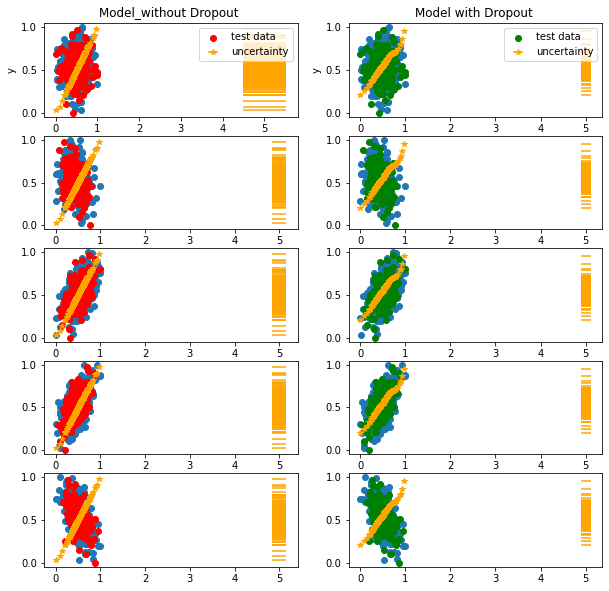

In [45]:
fig,ex = plt.subplots(5,2)


ex[0,0].scatter(x_train.iloc[:,[0]],y_train)
ex[0,0].scatter(x_test.iloc[:,[0]],y_test, color='red', label='test data')
ex[0,0].errorbar(y_test,y_pred_wodp, xerr=mean_wodp, fmt='*', color='orange', label='uncertainty')
ex[0,0].set_title('Model_without Dropout ')
ex[0,1].scatter(x_train.iloc[:,[0]],y_train)
ex[0,1].scatter(x_test.iloc[:,[0]], y_test, color='green', label='test data')
ex[0,1].errorbar(y_test,y_pred_wdp, xerr=sd_wdp, fmt='*', color='orange', label='uncertainty')
ex[0,1].set_title('Model with Dropout ')
ex[0,0].set_xlabel('x')
ex[0,0].set_ylabel('y')
ex[0,0].legend()
ex[0,1].set_xlabel('x')
ex[0,1].set_ylabel('y')
ex[0,1].legend()
ex[1,0].scatter(x_train.iloc[:,[1]],y_train)
ex[1,0].scatter(x_test.iloc[:,[1]],y_test, color='red', label='test data')
ex[1,0].errorbar(y_test,y_pred_wodp, xerr=sd_wodp, fmt='*', color='orange', label='uncertainty')
ex[1,1].scatter(x_train.iloc[:,[1]],y_train)
ex[1,1].scatter(x_test.iloc[:,[1]], y_test, color='green', label='test data')
ex[1,1].errorbar(y_test,y_pred_wdp, xerr=sd_wdp, fmt='*', color='orange', label='uncertainty')
ex[2,0].scatter(x_train.iloc[:,[2]],y_train)
ex[2,0].scatter(x_test.iloc[:,[2]],y_test, color='red', label='test data')
ex[2,0].errorbar(y_test,y_pred_wodp, xerr=sd_wodp, fmt='*', color='orange', label='uncertainty')
ex[2,1].scatter(x_train.iloc[:,[2]],y_train)
ex[2,1].scatter(x_test.iloc[:,[2]], y_test, color='green', label='test data')
ex[2,1].errorbar(y_test,y_pred_wdp, xerr=sd_wdp, fmt='*', color='orange', label='uncertainty')

ex[3,0].scatter(x_train.iloc[:,[3]],y_train)
ex[3,0].scatter(x_test.iloc[:,[3]],y_test, color='red', label='test data')
ex[3,0].errorbar(y_test,y_pred_wodp, xerr=sd_wodp, fmt='*', color='orange', label='uncertainty')
ex[3,1].scatter(x_train.iloc[:,[3]],y_train)
ex[3,1].scatter(x_test.iloc[:,[3]], y_test, color='green', label='test data')
ex[3,1].errorbar(y_test,y_pred_wdp, xerr=sd_wdp, fmt='*', color='orange', label='uncertainty')

ex[4,0].scatter(x_train.iloc[:,[4]],y_train)
ex[4,0].scatter(x_test.iloc[:,[4]],y_test, color='red', label='test data')
ex[4,0].errorbar(y_test,y_pred_wodp, xerr=sd_wodp, fmt='*', color='orange', label='uncertainty')
ex[4,1].scatter(x_train.iloc[:,[4]],y_train)
ex[4,1].scatter(x_test.iloc[:,[4]], y_test, color='green', label='test data')
ex[4,1].errorbar(y_test,y_pred_wdp, xerr=sd_wdp, fmt='*', color='orange', label='uncertainty')

